# Module 4: Data Preprocessing

The following tutorial contains Python examples for data preprocessing. You should refer to the "Data" chapter of the "Introduction to Data Mining" book (slides are available at https://www-users.cs.umn.edu/~kumar001/dmbook/index.php) to understand some of the concepts introduced in this tutorial.
Data preprocessing consists of a broad set of techniques for cleaning, selecting, and transforming data to improve data mining analysis. Read the step-by-step instructions below carefully. To execute the code, click on the corresponding cell and press the SHIFT-ENTER keys simultaneously.

## Data Quality Issues

Poor data quality can have an adverse effect on data mining. Among the common data quality issues include noise, outliers, missing values, and duplicate data. This section presents examples of Python code to alleviate some of these data quality problems. We begin with an example dataset from the UCI machine learning repository containing information about breast cancer patients. We will first download the dataset using Pandas read_csv() function and display its first 5 data points.

**<font color="red">Code:</font>**

In [5]:
import pandas as pd

# header = None means that there are no headers in the csv file
# therefore we need to define the column names, but csv defines those
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)

# since there is no pre defined heading, we have to set the column names
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

# Drop any not needed columns (axis = 1 means column)
data = data.drop(['Sample code'],axis=1)

# instances means # of records or rows
print('Number of instances = %d' % (data.shape[0]))

# Attributes (or dimensions) mean # of columns
print('Number of attributes = %d' % (data.shape[1]))

# give me the first five records in the table
data.head()

Number of instances = 699
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


### Missing Values

It is not unusual for an object to be missing one or more attribute values. In some cases, the information was not collected; while in other cases, some attributes are inapplicable to the data instances. This section presents examples on the different approaches for handling missing values.

According to the description of the data (https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original), the missing values are encoded as '?' in the original data. Our first task is to convert the missing values to NaNs. We can then count the number of missing values in each column of the data.

**<font color="red">Code:</font>**

In [12]:
import numpy as np

# replace all ? with NaN (not a number values)
data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    # we sum all the nan values and print out
    # how many there are for each column
    print('\t%s type=%s: %d' % (col, type(data[col][0]),data[col].isna().sum()))

Number of instances = 699
Number of attributes = 10
Number of missing values:
	Clump Thickness type=<class 'numpy.int64'>: 0
	Uniformity of Cell Size type=<class 'numpy.int64'>: 0
	Uniformity of Cell Shape type=<class 'numpy.int64'>: 0
	Marginal Adhesion type=<class 'numpy.int64'>: 0
	Single Epithelial Cell Size type=<class 'numpy.int64'>: 0
	Bare Nuclei type=<class 'str'>: 16
	Bland Chromatin type=<class 'numpy.int64'>: 0
	Normal Nucleoli type=<class 'numpy.int64'>: 0
	Mitoses type=<class 'numpy.int64'>: 0
	Class type=<class 'numpy.int64'>: 0


Observe that only the 'Bare Nuclei' column contains missing values. In the following example, the missing values in the 'Bare Nuclei' column are replaced by the median value of that column. The values before and after replacement are shown for a subset of the data points.

**<font color="red">Code:</font>**

In [13]:
import pandas as pd
data2 = data['Bare Nuclei']
data2 = pd.to_numeric(data2)

print('Before replacing missing values:')
print(data2[20:25])
data2 = data2.fillna(data2.median())

print('\nAfter replacing missing values:')
print(data2[20:25])

Before replacing missing values:
20    10.0
21     7.0
22     1.0
23     NaN
24     1.0
Name: Bare Nuclei, dtype: float64

After replacing missing values:
20    10.0
21     7.0
22     1.0
23     1.0
24     1.0
Name: Bare Nuclei, dtype: float64


Instead of replacing the missing values, another common approach is to discard the data points that contain missing values. This can be easily accomplished by applying the dropna() function to the data frame.

**<font color="red">Code:</font>**

In [ ]:
print('Number of rows in original data = %d' % (data.shape[0]))

data2 = data.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

Number of rows in original data = 699
Number of rows after discarding missing values = 683


### Outliers

Outliers are data instances with characteristics that are considerably different from the rest of the dataset. In the example code below, we will draw a boxplot to identify the columns in the table that contain outliers. Note that the values in all columns (except for 'Bare Nuclei') are originally stored as 'int64' whereas the values in the 'Bare Nuclei' column are stored as string objects (since the column initially contains strings such as '?' for representing missing values). Thus, we must  convert the column into numeric values first before creating the boxplot. Otherwise, the column will not be displayed when drawing the boxplot.

**<font color="red">Code:</font>**

In [15]:
%matplotlib inline

data2 = data.drop(['Class'],axis=1)
data2['Bare Nuclei'] = pd.to_numeric(data2['Bare Nuclei'])
data2.boxplot(figsize=(20,3))

<Axes: >

The boxplots suggest that only 5 of the columns (Marginal Adhesion, Single Epithetial Cell Size, Bland Cromatin, Normal Nucleoli, and Mitoses) contain abnormally high values. To discard the outliers, we can compute the Z-score for each attribute and remove those instances containing attributes with abnormally high or low Z-score (e.g., if Z > 3 or Z <= -3).

**<font color="red">Code:</font>**

The following code shows the results of standardizing the columns of the data. Note that missing values (NaN) are not affected by the standardization process.

In [ ]:
Z = (data2-data2.mean())/data2.std()
Z[20:25]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.771569,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.948266,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,NaN,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666


**<font color="red">Code:</font>**

The following code shows the results of discarding columns with Z > 3 or Z <= -3.

In [ ]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 699
Number of rows after discarding missing values = 632


### Duplicate Data

Some datasets, especially those obtained by merging multiple data sources, may contain duplicates or near duplicate instances. The term deduplication is often used to refer to the process of dealing with duplicate data issues.

**<font color="red">Code:</font>**

In the following example, we first check for duplicate instances in the breast cancer dataset.

In [ ]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data.loc[[11,28]]

Number of duplicate rows = 236


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
11,2,1,1,1,2,1,2,1,1,2
28,2,1,1,1,2,1,2,1,1,2


The duplicated() function will return a Boolean array that indicates whether each row is a duplicate of a previous row in the table. The results suggest there are 236 duplicate rows in the breast cancer dataset. For example, the instance with row index 11 has identical attribute values as the instance with row index 28. Although such duplicate rows may correspond to samples for different individuals, in this hypothetical example, we assume that the duplicates are samples taken from the same individual and illustrate below how to remove the duplicated rows.

**<font color="red">Code:</font>**

In [ ]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates = 463


### Shuffling Dataframes
It is possible to shuffle.  

In [ ]:
import os
import numpy as np
import pandas as pd

path = "/data" #data file can be dowloaded from the link https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

filename_read = os.path.join(path,"auto-mpg.csv") #The file is available to download from canvas in path Files --> Lab Help --> Labs --> data
df = pd.read_csv(filename_read, na_values=['NA','?'])

#np.random.seed(30) # Uncomment this line to get the same shuffle each time

df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)
# use inplace=False
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,32.0,4,83.0,61.0,2003,19.0,74,3,datsun 710
1,20.0,4,97.0,88.0,2279,19.0,73,3,toyota carina
2,31.5,4,98.0,68.0,2045,18.5,77,3,honda accord cvcc
3,25.4,6,168.0,116.0,2900,12.6,81,3,toyota cressida
4,25.0,4,113.0,95.0,2228,14.0,71,3,toyota corona
...,...,...,...,...,...,...,...,...,...
393,19.0,6,250.0,88.0,3302,15.5,71,1,ford torino 500
394,38.0,4,105.0,63.0,2125,14.7,82,1,plymouth horizon miser
395,16.0,8,351.0,149.0,4335,14.5,77,1,ford thunderbird
396,30.0,4,97.0,67.0,1985,16.4,77,3,subaru dl


### Sorting Dataframes
It is possible to sort.

In [ ]:
df = df.sort_values(by='name',ascending=True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
43,13.0,8,360.0,175.0,3821,11.0,73,1,amc ambassador brougham
195,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl
117,17.0,8,304.0,150.0,3672,11.5,72,1,amc ambassador sst
91,19.4,6,232.0,90.0,3210,17.2,78,1,amc concord
185,24.3,4,151.0,90.0,3003,20.1,80,1,amc concord
...,...,...,...,...,...,...,...,...,...
214,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
182,41.5,4,98.0,76.0,2144,14.7,80,2,vw rabbit
126,29.0,4,90.0,70.0,1937,14.2,76,2,vw rabbit
288,44.3,4,90.0,48.0,2085,21.7,80,2,vw rabbit c (diesel)


In [ ]:
print("The first car is: {}".format(df['name'].iloc[0]))

The first car is: amc ambassador brougham


In [ ]:
print("The first car is: {}".format(df['name'].loc[0]))


#loc gets rows (or columns) with particular labels from the index.
#iloc gets rows (or columns) at particular positions in the index (so it only takes integers).

The first car is: datsun 710


### Saving a Dataframe

The following code performs a shuffle and then saves a new copy.

In [ ]:
import os
import pandas as pd
import numpy as np

path = "/data" #data file can be dowloaded from the link https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

filename_read = os.path.join(path,"auto-mpg.csv") #The file is available to download from canvas in path Files --> Lab Help --> Labs --> data
filename_write = os.path.join(path,"auto-mpg-shuffle.csv") #The file is available to download from canvas in path Files --> Lab Help --> Labs --> data
df = pd.read_csv(filename_read,na_values=['NA','?'])
df = df.reindex(np.random.permutation(df.index))
df.to_csv(filename_write,index=False)   # Specify index = false to not write row numbers
print("Done")

Done


### Dropping Fields

Some fields are of no value to the neural network and can be dropped.  The following code removes the name column from the MPG dataset.

In [ ]:
import os
import pandas as pd
import numpy as np

path = "/data" #data file can be dowloaded from the link https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

filename_read = os.path.join(path,"auto-mpg.csv") #The file is available to download from canvas in path Files --> Lab Help --> Labs --> data
df = pd.read_csv(filename_read,na_values=['NA','?'])

print("Before drop: {}".format(df.columns))
df.drop('name', axis=1, inplace=True)
print("After drop: {}".format(df.columns))
df[0:5]

Before drop: Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')
After drop: Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


### Calculated Fields

It is possible to add new fields to the dataframe that are calculated from the other fields.  We can create a new column that gives the weight in kilograms.  The equation to calculate a metric weight, given a weight in pounds is:

$ m_{(kg)} = m_{(lb)} \times 0.45359237 $

This can be used with the following Python code:

In [ ]:
import os
import pandas as pd
import numpy as np

path = "/data" #data file can be dowloaded from the link https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

filename_read = os.path.join(path,"auto-mpg.csv") #The file is available to download from canvas in path Files --> Lab Help --> Labs --> data
df = pd.read_csv(filename_read,na_values=['NA','?'])
df.insert(1,'weight_kg',(df['weight']*0.45359237).astype(int))
df

,mpg,weight_kg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,1589,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,1675,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,1558,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,1557,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,1564,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,1265,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,966,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,1040,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,1190,4,120.0,79.0,2625,18.6,82,1,ford ranger


### Feature Normalization

A normalization allows numbers to be put in a standard form so that two values can easily be compared. One very common machine learning normalization is the Z-Score:

$z = {x- \mu \over \sigma} $

To calculate the Z-Score you need to also calculate the mean($\mu$) and the standard deviation ($\sigma$).  The mean is calculated as follows:

$\mu = \bar{x} = \frac{x_1+x_2+\cdots +x_n}{n}$

The standard deviation is calculated as follows:

$\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2}, {\rm \ \ where\ \ } \mu = \frac{1}{N} \sum_{i=1}^N x_i$

The following Python code ***replaces the mpg with a z-score***.  Cars with average MPG will be near zero, above zero is above average, and below zero is below average.  Z-Scores above/below -3/3 are very rare, these are outliers.

In [ ]:
import os
import pandas as pd
import numpy as np
from scipy.stats import zscore

path = "/data" #data file can be dowloaded from the link https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

filename_read = os.path.join(path,"auto-mpg.csv") #The file is available to download from canvas in path Files --> Lab Help --> Labs --> data
df = pd.read_csv(filename_read,na_values=['NA','?'])
df['mpg'] = zscore(df['mpg'])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,-0.706439,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,-1.090751,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,-0.706439,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,-0.962647,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,-0.834543,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,0.446497,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,2.624265,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,1.087017,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,0.574601,4,120.0,79.0,2625,18.6,82,1,ford ranger


### Missing Values

You can also simply drop any rows with any NA values.  Another common practice is to replace missing values with the median value for that column. The following code replaces any NA values in horsepower with the median:

In [ ]:
import os
import pandas as pd
import numpy as np
from scipy.stats import zscore

path = "/data" #data file can be dowloaded from the link https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

filename_read = os.path.join(path,"auto-mpg.csv") #The file is available to download from canvas in path Files --> Lab Help --> Labs --> data
df = pd.read_csv(filename_read,na_values=['NA','?'])
med = df['horsepower'].median()
df['horsepower'] = df['horsepower'].fillna(med)

# df = df.dropna() # you can also simply drop NA values

### Concatenating Rows and Columns
Rows and columns can be concatenated together to form new data frames.

In [ ]:
# Create a new dataframe from name and horsepower

import os
import pandas as pd
import numpy as np
from scipy.stats import zscore

path = "/data" #data file can be dowloaded from the link https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

filename_read = os.path.join(path,"auto-mpg.csv") #The file is available to download from canvas in path Files --> Lab Help --> Labs --> data
df = pd.read_csv(filename_read,na_values=['NA','?'])
col_horsepower = df['horsepower']
col_name = df['name']
result = pd.concat([col_name,col_horsepower],axis=1)
result

,name,horsepower
0,chevrolet chevelle malibu,130.0
1,buick skylark 320,165.0
2,plymouth satellite,150.0
3,amc rebel sst,150.0
4,ford torino,140.0
...,...,...
393,ford mustang gl,86.0
394,vw pickup,52.0
395,dodge rampage,84.0
396,ford ranger,79.0


In [ ]:
# Create a new dataframe from name and horsepower, but this time by row

import os
import pandas as pd
import numpy as np
from scipy.stats import zscore

path = "/data" #data file can be dowloaded from the link https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

filename_read = os.path.join(path,"auto-mpg.csv") #The file is available to download from canvas in path Files --> Lab Help --> Labs --> data
df = pd.read_csv(filename_read,na_values=['NA','?'])
col_horsepower = df['horsepower']
col_name = df['name']
result = pd.concat([col_name,col_horsepower])
result

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393                         86.0
394                         52.0
395                         84.0
396                         79.0
397                         82.0
Length: 796, dtype: object

# Helpful Functions for Tensorflow (Little Gems)

The following functions will be used with TensorFlow to help preprocess the data.  

### They allow you to build the feature vector in the format that TensorFlow expects from raw data.

(1) Encoding data:

* **encode_text_dummy** - Encode text fields as numeric, such as the iris species as a single field for each class.  Three classes would become "0,0,1" "0,1,0" and "1,0,0". Encode non-target features this way. used when the data is part of input ***(one hot encoding)***
* **encode_text_index** - Encode text fields to numeric, such as the iris species as a single numeric field as "0" "1" and "2".  Encode the target field for a classification this way.  used when data is part of output            ***(label encoding)***

(2) Normalizing data:

* **encode_numeric_zscore** - Encode numeric values as a z-score.  Neural networks deal well with "normalized" fields only.
* **encode_numeric_range** - Encode a column to a range between the given normalized_low and normalized_high.

(3) Dealing with missing data:

* **missing_median** - Fill all missing values with the median value.


(4) Removing outliers:

* **remove_outliers**  - Remove outliers in a certain column with a value beyond X times SD


(5) Creating the feature vector and target vector that *** Tensorflow needs***:

* **to_xy** - ***Once all fields are encoded to numeric, this function can provide the x and y matrixes that TensorFlow needs to fit the neural network with data.***

(6) Other utility functions:

* **hms_string** - Print out an elapsed time string.
* **chart_regression** - Display a chart to show how well a regression performs.

In [ ]:
import collections.abc
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os


# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.abc.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) * (normalized_high - normalized_low) + normalized_low


### Examples of label encoding, one hot encoding,  and creating X/Y for TensorFlow

In [ ]:
df=pd.read_csv("iris.csv",na_values=['NA','?']) #The file is available to download from canvas in path Files --> Lab Help --> Labs --> data
df

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
encode_text_index(df,"species")   # label encoding
df

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df=pd.read_csv("iris.csv",na_values=['NA','?']) #The file is available to download from canvas in path Files --> Lab Help --> Labs --> data

encode_text_dummy(df,"species")   # One hot encoding
df

,sepal_l,sepal_w,petal_l,petal_w,species-Iris-setosa,species-Iris-versicolor,species-Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


### Make sure you encode the lables first before you call to_xy()

In [ ]:
df=pd.read_csv("iris.csv",na_values=['NA','?']) #The file is available to download from canvas in path Files --> Lab Help --> Labs --> data

encode_text_index(df,"species")    # encoding first before you call to_xy()

df

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
x,y = to_xy(df,"species")

In [ ]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

## Example of Deal with Missing Values and Outliers

In [ ]:
path = "/data" #data file can be dowloaded from the link https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

filename_read = os.path.join(path,"auto-mpg.csv") #The file is available to download from canvas in path Files --> Lab Help --> Labs --> data
df = pd.read_csv(filename_read,na_values=['NA','?'])

# Handle mising values in horsepower
missing_median(df, 'horsepower')
#df.drop('name', 1,inplace=True)

# Drop outliers in horsepower
print("Length before MPG outliers dropped: {}".format(len(df)))
remove_outliers(df,'mpg',2)
print("Length after MPG outliers dropped: {}".format(len(df)))


Length before MPG outliers dropped: 398
Length after MPG outliers dropped: 388


## Training and Validation

The machine learning model will learn from the training data, but ultimately be evaluated based on the validation data.

* **Training Data** - **In Sample Data** - The data that the machine learning model was fit to/created from.
* **Validation Data** - **Out of Sample Data** - The data that the machine learning model is evaluated upon after it is fit to the training data.

There are two predominant means of dealing with training and validation data:

* **Training/Test Split** - The data are split according to some ratio between a training and validation (hold-out) set.  Common ratios are 80% training and 20% validation.
* **K-Fold Cross Validation** - The data are split into a number of folds and models.  Because a number of models equal to the folds is created out-of-sample predictions can be generated for the entire dataset.

### Training/Test Split

The code below performs a split of the MPG data into a training and validation set.  The training set uses 80% of the data and the test(validation) set uses 20%.

The following image shows how a model is trained on 80% of the data and then validated against the remaining 20%.

![Training and Validation](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_1_train_val.png "Training and Validation")



In [ ]:
import pandas as pd
import io
import numpy as np
import os
from sklearn.model_selection import train_test_split


path = "/data" #data file can be dowloaded from the link https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

filename = os.path.join(path,"iris.csv") #The file is available to download from canvas in path Files --> Lab Help --> Labs --> data
df = pd.read_csv(filename,na_values=['NA','?'])

df[0:5]

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['encoded_species'] = le.fit_transform(df['species'])

df[0:5]

,sepal_l,sepal_w,petal_l,petal_w,species,encoded_species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [ ]:
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(df[['sepal_l', 'sepal_w', 'petal_l', 'petal_w']], df['encoded_species'], test_size=0.25, random_state=42)


In [ ]:
x_train.shape

(112, 4)

In [ ]:
y_train.shape

(112,)

In [ ]:
x_test.shape

(38, 4)

In [ ]:
y_test.shape

(38,)

# Aggregation

Data aggregation is a preprocessing task where the values of two or more objects are combined into a single object. The motivation for aggregation includes (1) reducing the size of data to be processed, (2) changing the granularity of analysis (from fine-scale to coarser-scale), and (3) improving the stability of the data.

In the example below, we will use the daily precipitation time series data for a weather station located at Detroit Metro Airport. The raw data was obtained from the Climate Data Online website (https://www.ncdc.noaa.gov/cdo-web/). The daily precipitation time series will be compared against its monthly values.

**<font color="red">Code:</font>**

The code below will load the precipitation time series data and draw a line plot of its daily time series.

Text(0.5, 1.0, 'Daily Precipitation (variance = 0.0530)')

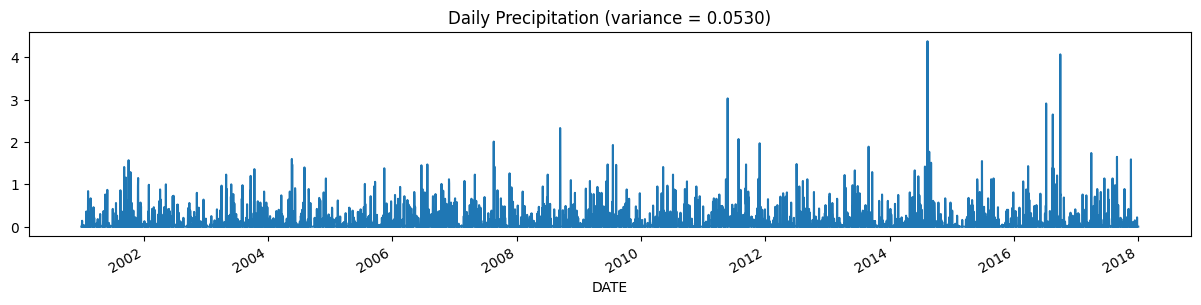

In [ ]:
daily = pd.read_csv('DTW_prec.csv', header='infer') #The file is available to download from canvas in path Files --> Lab Help --> Labs
daily.index = pd.to_datetime(daily['DATE'])
daily = daily['PRCP']
ax = daily.plot(kind='line',figsize=(15,3))
ax.set_title('Daily Precipitation (variance = %.4f)' % (daily.var()))

In [ ]:
daily

DATE
2001-01-01    0.00
2001-01-02    0.00
2001-01-03    0.00
2001-01-04    0.04
2001-01-05    0.14
              ... 
2017-12-27    0.00
2017-12-28    0.00
2017-12-29    0.00
2017-12-30    0.00
2017-12-31    0.00
Name: PRCP, Length: 6191, dtype: float64

Observe that the daily time series appear to be quite chaotic and varies significantly from one time step to another. The time series can be grouped and aggregated by month to obtain the total monthly precipitation values. The resulting time series appears to vary more smoothly compared to the daily time series.

**<font color="red">Code:</font>**

Text(0.5, 1.0, 'Monthly Precipitation (variance = 2.4241)')

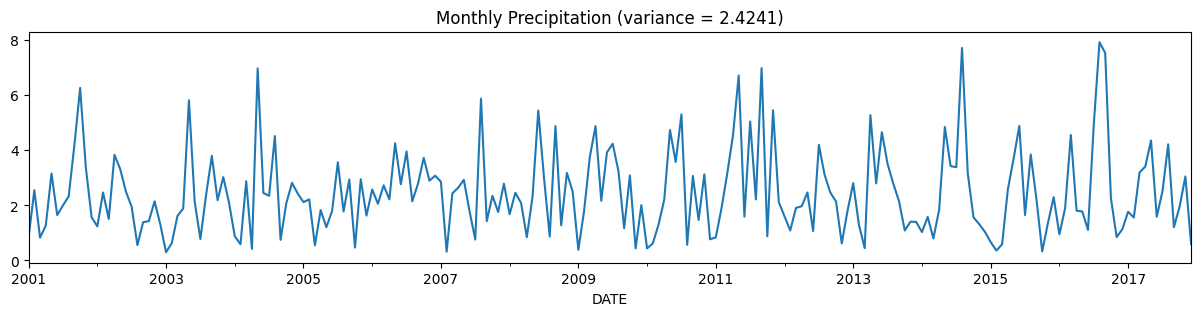

In [ ]:
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
ax = monthly.plot(kind='line',figsize=(15,3))
ax.set_title('Monthly Precipitation (variance = %.4f)' % (monthly.var()))

In the example below, the daily precipitation time series are grouped and aggregated by year to obtain the annual precipitation values.

**<font color="red">Code:</font>**

Text(0.5, 1.0, 'Annual Precipitation (variance = 23.6997)')

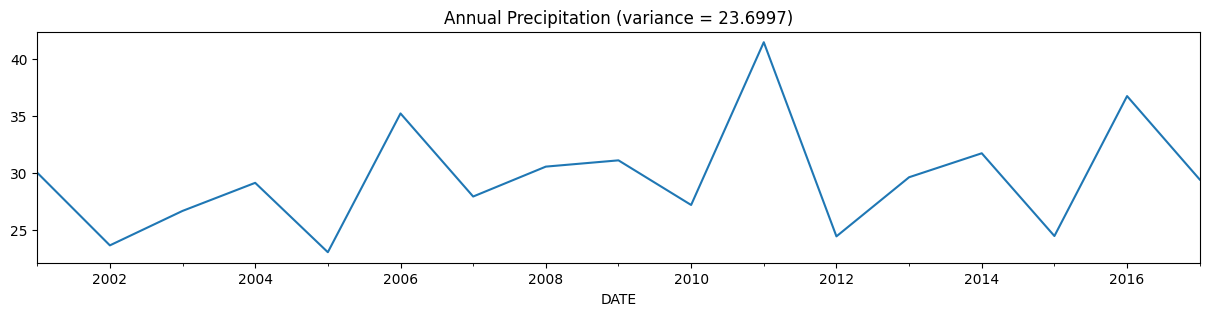

In [ ]:
annual = daily.groupby(pd.Grouper(freq='Y')).sum()
ax = annual.plot(kind='line',figsize=(15,3))
ax.set_title('Annual Precipitation (variance = %.4f)' % (annual.var()))

# Sampling

Sampling is an approach commonly used to facilitate (1) data reduction for exploratory data analysis and scaling up algorithms to big data applications and (2) quantifying uncertainties due to varying data distributions. There are various methods available for data sampling, such as sampling without replacement, where each selected instance is removed from the dataset, and sampling with replacement, where each selected instance is not removed, thus allowing it to be selected more than once in the sample.

In the example below, we will apply sampling with replacement and without replacement to the breast cancer dataset obtained from the UCI machine learning repository.

**<font color="red">Code:</font>**

We initially display the first five records of the table.

In [ ]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In the following code, a sample of size 3 is randomly selected (without replacement) from the original data.

**<font color="red">Code:</font>**

In [ ]:
sample = data.sample(n=3)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
526,4,1,1,1,2,1,1,1,1,2
186,1,5,8,6,5,8,7,10,1,4
245,5,1,1,2,2,2,3,1,1,2


In the next example, we randomly select 1% of the data (without replacement) and display the selected samples. The random_state argument of the function specifies the seed value of the random number generator.

**<font color="red">Code:</font>**

In [ ]:
sample = data.sample(frac=0.01, random_state=1)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
584,5,1,1,6,3,1,1,1,1,2
417,1,1,1,1,2,1,2,1,1,2
606,4,1,1,2,2,1,1,1,1,2
349,4,2,3,5,3,8,7,6,1,4
134,3,1,1,1,3,1,2,1,1,2
502,4,1,1,2,2,1,2,1,1,2
117,4,5,5,10,4,10,7,5,8,4


Finally, we perform a sampling with replacement to create a sample whose size is equal to 1% of the entire data. You should be able to observe duplicate instances in the sample by increasing the sample size.

**<font color="red">Code:</font>**

In [ ]:
sample = data.sample(frac=0.01, replace=True, random_state=1)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
37,6,2,1,1,1,1,7,1,1,2
235,3,1,4,1,2,NaN,3,1,1,2
72,1,3,3,2,2,1,7,2,1,2
645,3,1,1,1,2,1,2,1,1,2
144,2,1,1,1,2,1,2,1,1,2
129,1,1,1,1,10,1,1,1,1,2
583,3,1,1,1,2,1,1,1,1,2


# Discretization

Discretization is a data preprocessing step that is often used to transform a continuous-valued attribute to a categorical attribute. The example below illustrates two simple but widely-used unsupervised discretization methods (equal width and equal depth) applied to the 'Clump Thickness' attribute of the breast cancer dataset.

First, we plot a histogram that shows the distribution of the attribute values. The value_counts() function can also be applied to count the frequency of each attribute value.

**<font color="red">Code:</font>**

5     130
3     108
6      34
4      80
8      46
1     145
2      50
7      23
10     69
9      14
Name: Clump Thickness, dtype: int64

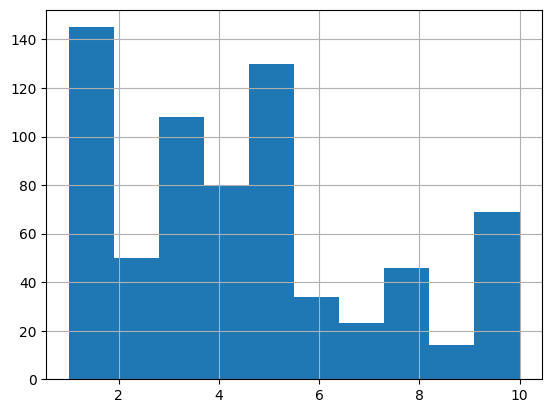

In [ ]:
data['Clump Thickness'].hist(bins=10)
data['Clump Thickness'].value_counts(sort=False)

For the equal width method, we can apply the cut() function to discretize the attribute into 4 bins of similar interval widths. The value_counts() function can be used to determine the number of instances in each bin.

**<font color="red">Code:</font>**

In [ ]:
bins = pd.cut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

(0.991, 3.25]    303
(3.25, 5.5]      210
(5.5, 7.75]       57
(7.75, 10.0]     129
Name: Clump Thickness, dtype: int64

For the equal frequency method, the qcut() function can be used to partition the values into 4 bins such that each bin has nearly the same number of instances.

**<font color="red">Code:</font>**

In [ ]:
bins = pd.qcut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

(0.999, 2.0]    195
(2.0, 4.0]      188
(4.0, 6.0]      164
(6.0, 10.0]     152
Name: Clump Thickness, dtype: int64

# Principal Component Analysis

Principal component analysis (PCA) is a classical method for reducing the number of attributes in the data by projecting the data from its original high-dimensional space into a lower-dimensional space. The new attributes (also known as components) created by PCA have the following properties: (1) they are linear combinations of the original attributes, (2) they are orthogonal (perpendicular) to each other, and (3) they capture the maximum amount of variation in the data.

The example below illustrates the application of PCA to an image dataset. There are 16 RGB files, each of which has a size of 111 x 111 pixels. The example code below will read each image file and convert the RGB image into a 111 x 111 x 3 = 36963 feature values. This will create a data matrix of size 16 x 36963.    

**<font color="red">Code:</font>**

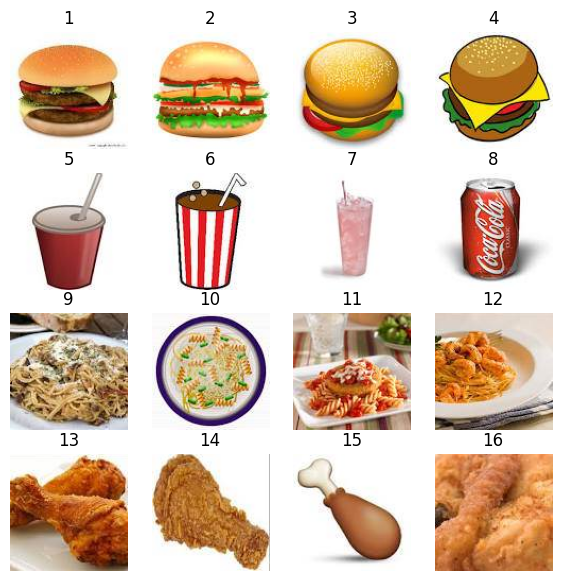

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

numImages = 16
fig = plt.figure(figsize=(7,7))
imgData = np.zeros(shape=(numImages,36963))

for i in range(1,numImages+1):
    filename = 'pics/Picture'+str(i)+'.jpg' #The file is available to download from canvas in path Files --> Lab Help --> Labs
    img = mpimg.imread(filename)
    ax = fig.add_subplot(4,4,i)
    plt.imshow(img)
    plt.axis('off')
    ax.set_title(str(i))
    imgData[i-1] = np.array(img.flatten()).reshape(1,img.shape[0]*img.shape[1]*img.shape[2])

Using PCA, the data matrix is projected to its first two principal components. The projected values of the original image data are stored in a pandas DataFrame object named projected.

**<font color="red">Code:</font>**

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

numComponents = 2
pca = PCA(n_components=numComponents)
pca.fit(imgData)

projected = pca.transform(imgData)
projected = pd.DataFrame(projected,columns=['pc1','pc2'],index=range(1,numImages+1))
projected['food'] = ['burger', 'burger','burger','burger','drink','drink','drink','drink',
                      'pasta', 'pasta', 'pasta', 'pasta', 'chicken', 'chicken', 'chicken', 'chicken']
projected

,pc1,pc2,food
1,-1592.865032,6650.748233,burger
2,-513.037047,6332.829578,burger
3,963.286575,7210.003243,burger
4,2165.058923,9039.728928,burger
5,-7842.483458,-1064.077319,drink
6,-8458.900677,-5385.688570,drink
7,-11181.818077,-5359.358892,drink
8,-6831.007390,1129.386544,drink
9,7639.872584,-5060.302857,pasta
10,-704.457255,-532.285100,pasta


Finally, we draw a scatter plot to display the projected values. Observe that the images of burgers, drinks, and pastas  are all projected to the same region. However, the images for fried chicken (shown as black squares in the diagram) are harder to discriminate.

**<font color="red">Code:</font>**

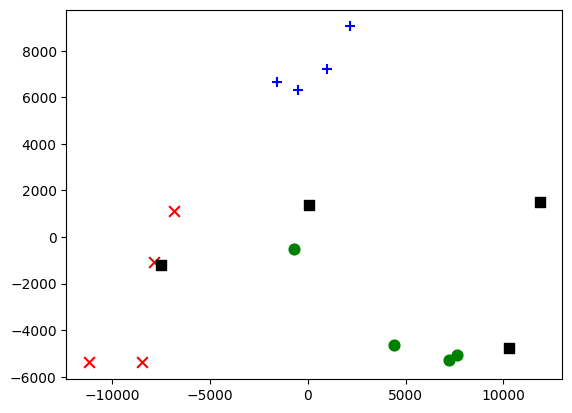

In [ ]:
import matplotlib.pyplot as plt

colors = {'burger':'b', 'drink':'r', 'pasta':'g', 'chicken':'k'}
markerTypes = {'burger':'+', 'drink':'x', 'pasta':'o', 'chicken':'s'}

for foodType in markerTypes:
    d = projected[projected['food']==foodType]
    plt.scatter(d['pc1'],d['pc2'],c=colors[foodType],s=60,marker=markerTypes[foodType])

### Feature Selection Techniques
The goal of feature selection techniques in machine learning is to find the best set of features that allows one to build optimized models of studied phenomena.

### Information Gain

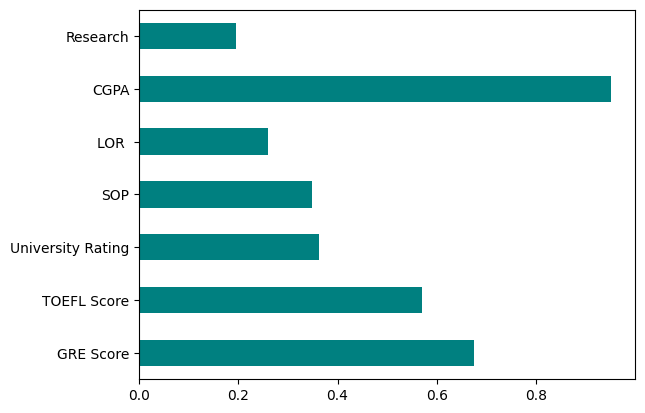

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import mutual_info_regression

df = pd.read_csv('Admission_Predict_Ver1.1.csv') #The file is available to download from canvas in path Files --> Lab Help --> Labs --> data --> Linear_Regression_data
X = df.iloc[:,1:-1]
Y = df.iloc[:,-1]
importances = mutual_info_regression(X, Y)
feat_importances = pd.Series(importances,X.columns)
feat_importances.plot(kind='barh',color = 'teal')
plt.show()

### Chi-square Test
The Chi-square test is used for categorical features in a dataset. We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores. In order to correctly apply the chi-squared to test the relation between various features in the dataset and the target variable, the following conditions have to be met: the variables have to be categorical, sampled independently, and values should have an expected frequency greater than 5.

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

X_Cat = X.astype(int)
le = LabelEncoder()
chi2_features = SelectKBest(chi2, k = 3)
Y = le.fit_transform(Y)
X_kbest_features = chi2_features.fit_transform(X_Cat,Y)

print('Original feature number:', X_Cat.shape[1])
print('Reduced feature number: ',X_kbest_features.shape[1])

Original feature number: 7
Reduced feature number:  3


### Correlation Coefficient
Correlation is a measure of the linear relationship between 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that good variables correlate highly with the target. Furthermore, variables should be correlated with the target but uncorrelated among themselves.

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only needs one, as the second does not add additional information. We will use the Pearson Correlation here.

<Axes: >

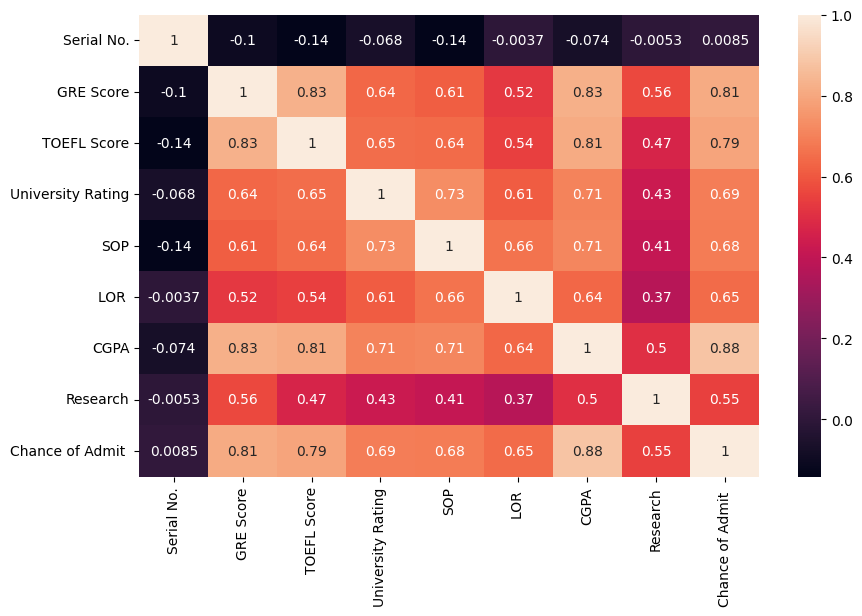

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

cor = df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(cor,annot= True)

### Variance Threshold

The variance threshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features with the same value in all samples. We assume that features with a higher variance may contain more useful information, but note that we are not taking the relationship between feature variables or feature and target variables into account, which is one of the drawbacks of filter methods.

The get_support returns a Boolean vector where True means the variable does not have zero variance.

In [38]:
from sklearn.feature_selection import VarianceThreshold

X = globals()["X"]


v_threshold = VarianceThreshold(threshold = 0)
v_threshold.fit(X)
v_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

### Mean Absolute Difference (MAD)
‘The mean absolute difference (MAD) computes the absolute difference from the mean value. The main difference between the variance and MAD measures is the absence of the square in the latter. The MAD, like the variance, is also a scaled variant.’ This means that the higher the MAD, the higher the discriminatory power.

<BarContainer object of 7 artists>

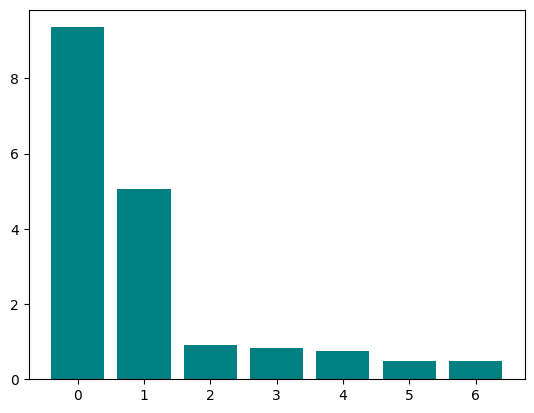

In [39]:
mean_abs_diff = np.sum(np.abs(X -np.mean(X, axis=0)), axis=0)/X.shape[0]

plt.bar(np.arange(X.shape[1]),mean_abs_diff,color = 'teal')

## Backward Elimination Techniques
## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing as prepr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

### Import dataset and do necessary changes

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv') #The file is available to download from canvas in path Files --> Lab Help --> Labs --> data --> Linear_Regression_data
print('Shape:{}'.format(df.shape))
print(df.head(10))
print(df.describe())
df.columns = [x.replace(' ', '').replace('.', '').lower() for x in list(df)] #converts columnnames to lower single words
del df['serialno']

Shape:(500, 9)
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   
5           6        330          115                  5  4.5   3.0  9.34   
6           7        321          109                  3  3.0   4.0  8.20   
7           8        308          101                  2  3.0   4.0  7.90   
8           9        302          102                  1  2.0   1.5  8.00   
9          10        323          108                  3  3.5   3.0  8.60   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3        

In [16]:
df.boxplot(showbox=True, figsize=(10,8))

NameError: name 'df' is not defined

### Standardizing the entire dataset using Min-Max scaling

In [4]:
cols = list(df)
scaler = prepr.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
print(scaled_df.head(10))
print(scaled_df.describe())

   grescore  toeflscore  universityrating    sop    lor      cgpa  research  \
0      0.94    0.928571              0.75  0.875  0.875  0.913462       1.0   
1      0.68    0.535714              0.75  0.750  0.875  0.663462       1.0   
2      0.52    0.428571              0.50  0.500  0.625  0.384615       1.0   
3      0.64    0.642857              0.50  0.625  0.375  0.599359       1.0   
4      0.48    0.392857              0.25  0.250  0.500  0.451923       0.0   
5      0.80    0.821429              1.00  0.875  0.500  0.814103       1.0   
6      0.62    0.607143              0.50  0.500  0.750  0.448718       1.0   
7      0.36    0.321429              0.25  0.500  0.750  0.352564       0.0   
8      0.24    0.357143              0.00  0.250  0.125  0.384615       0.0   
9      0.66    0.571429              0.50  0.625  0.500  0.576923       0.0   

   chanceofadmit  
0       0.920635  
1       0.666667  
2       0.603175  
3       0.730159  
4       0.492063  
5       0.888889

### Pairplot

This is a scatter plot of all the attributes on both x and y axes. 'chanceofadmit' is the dependent variable and the plot clearly shows that there are few attributes that have a linear relation with the dependent attribute. So we can move ahead with linear regression.



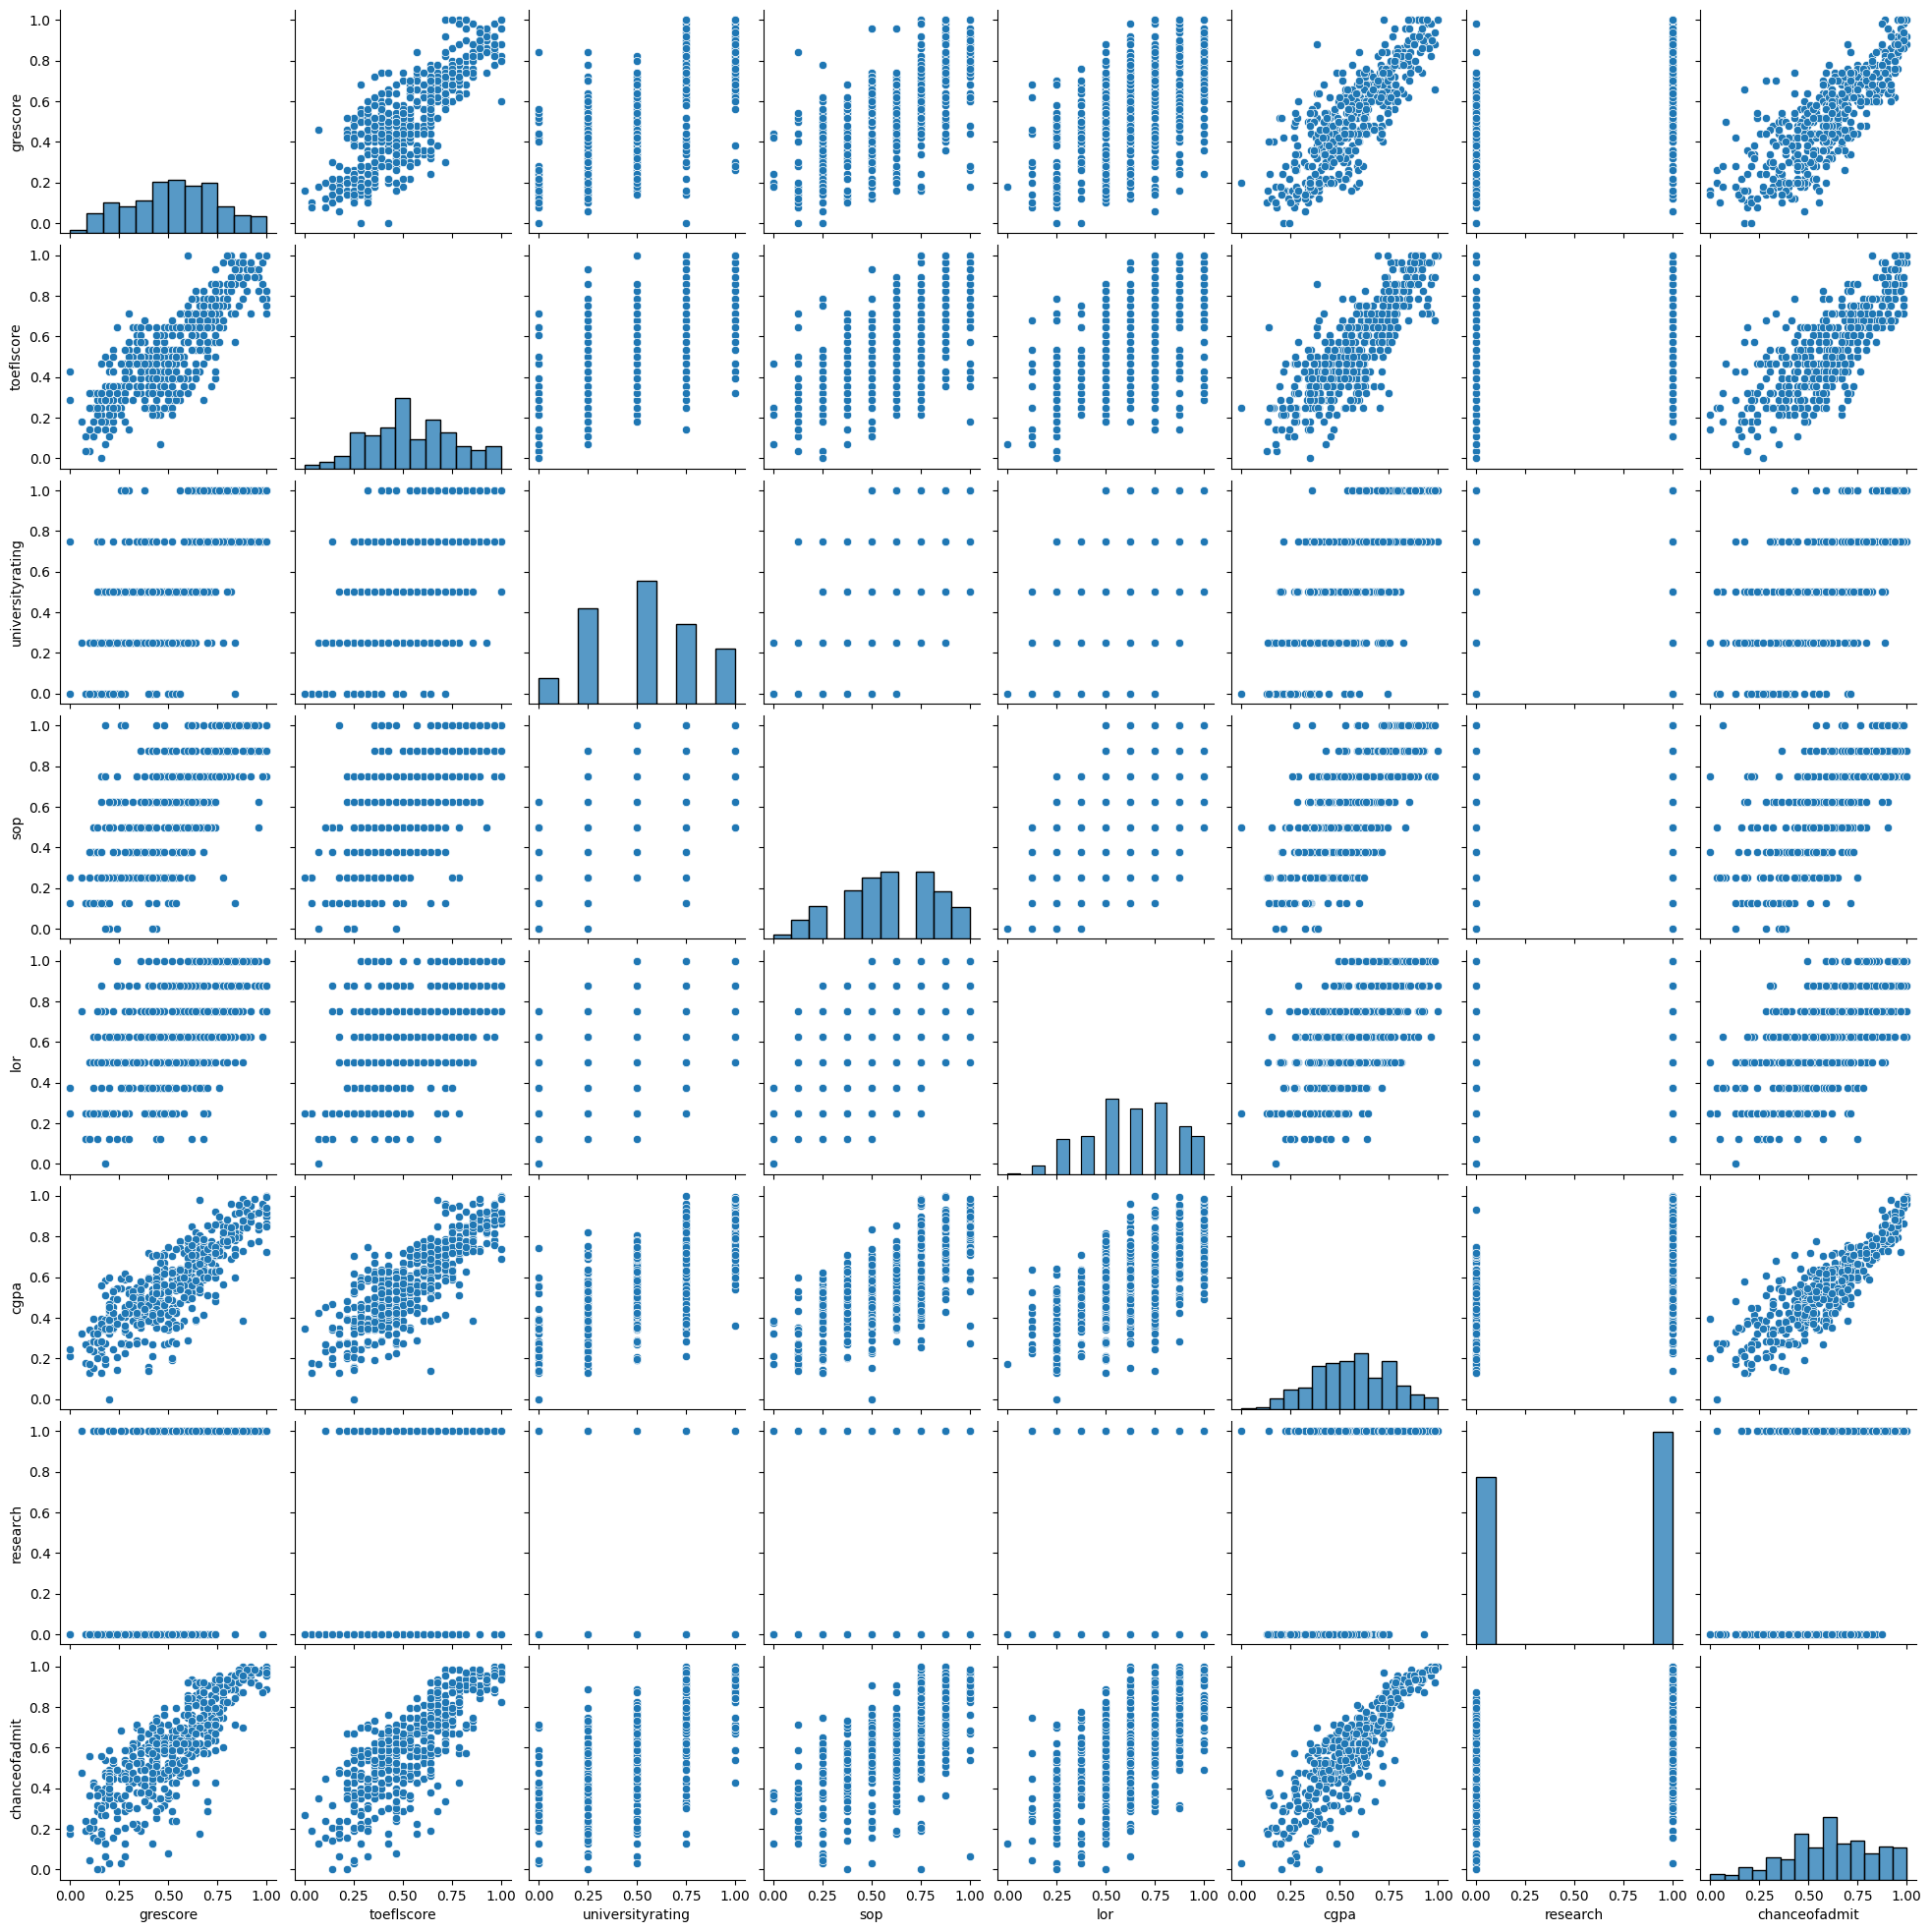

In [5]:
sns.pairplot(scaled_df)

#### Creating X and Y for the linear regression equation (Y = a  + $βX_{1}$ + $βX_{2}$ + ... + $βX_{n}$) where Y is the dependent variable and Xs are the independent variables

In [6]:
cols = list(scaled_df)
X = scaled_df.iloc[:, :-1]
y = scaled_df[cols[-1]]

### Using statsmodels provided Linear Regression Model

OLS is the function used to create a linear model. This model defines the linear regression formula as
Y = $aX_{0}$ + $βX_{1}$ + $βX_{2}$ + ... + $βX_{n}$.

So create a new attribute with all ones and append it to the start of the dataframe. This will serve as $X_{0}$

In [7]:
X = np.append(arr=np.ones([len(scaled_df.index), 1]).astype(int), values=X, axis=1)
options = X[:, [0, 1, 2, 3, 4, 5, 6, 7]]
lm_be = sm.OLS(endog=y, exog=options).fit()
print(lm_be.summary())

                            OLS Regression Results                            
Dep. Variable:          chanceofadmit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Sun, 03 Mar 2024   Prob (F-statistic):          8.21e-180
Time:                        08:47:32   Log-Likelihood:                 470.37
No. Observations:                 500   AIC:                            -924.7
Df Residuals:                     492   BIC:                            -891.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0130      0.014      0.902      0.3

In [8]:
# Remove attribute 4 (sop) as it has the highest p-value and rewrite the formula
options= X[:, [0, 1, 2, 3, 5, 6, 7]]
lm_be = sm.OLS(endog=y, exog=options).fit()
lm_be.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          chanceofadmit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     379.1
Date:                Sun, 03 Mar 2024   Prob (F-statistic):          4.29e-181
Time:                        08:47:47   Log-Likelihood:                 470.31
No. Observations:                 500   AIC:                            -926.6
Df Residuals:                     493   BIC:                            -897.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0135      0.014      0.935      0.350      -0.015       0.042
x1             0.1471      0.040      3.694      0.000       0.069       0.225
x2             0.1248      0.039      3.236      0.001       0.049       0.201
x3             0.0408      0.022      1.820      0.069      -0.003       0.085
x4             0.1098      0.025      4.380      0.000       0.061       0.159
x5             0.5893      0.047     12.481      0.000       0.497       0.682
x6             0.0387      0.010      3.691      0.000       0.018       0.059
==============================================================================
Omnibus:                      111.782   Durbin-Watson:                   0.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.656
Skew:                          -1.152   Prob(JB):                     6.82e-57
Kurtosis:                       5.667   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# Remove attribute 3 (universityrating) as it has the highest p-value and rewrite the formula
options = X[:, [0, 1, 2, 5, 6, 7]]
lm_be = sm.OLS(endog=y, exog=options).fit()
lm_be.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          chanceofadmit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     452.1
Date:                Sun, 03 Mar 2024   Prob (F-statistic):          9.97e-182
Time:                        08:47:59   Log-Likelihood:                 468.63
No. Observations:                 500   AIC:                            -925.3
Df Residuals:                     494   BIC:                            -900.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0085      0.014      0.598      0.550      -0.019       0.036
x1             0.1499      0.040      3.760      0.000       0.072       0.228
x2             0.1341      0.038      3.501      0.001       0.059       0.209
x3             0.1227      0.024      5.092      0.000       0.075       0.170
x4             0.6090      0.046     13.221      0.000       0.519       0.700
x5             0.0399      0.010      3.814      0.000       0.019       0.061
==============================================================================
Omnibus:                      109.027   Durbin-Watson:                   0.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.874
Skew:                          -1.130   Prob(JB):                     9.07e-55
Kurtosis:                       5.615   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Create train and test set from the attributes that are not eliminated by backward elimination

In [10]:
X_train, X_test, y_train, y_test = train_test_split(options, y, test_size=0.2, random_state=123)

### Create a regular Linear Regression model

In [11]:
lm = LinearRegression().fit(X_train, y_train)

### Predicting

In [13]:
#Predict
y_pred = lm.predict(X_test)

### Display Result

In [14]:
final_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(final_df.head(10))

       Actual  Predicted
229  0.761905   0.740063
337  0.952381   0.941972
327  0.555556   0.301407
416  0.492063   0.446706
306  0.714286   0.761012
131  0.682540   0.563316
5    0.888889   0.844722
431  0.619048   0.699565
434  0.476190   0.442705
134  0.873016   0.858961


### Calculate accuracy

In [15]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.01
Variance score: 0.78
